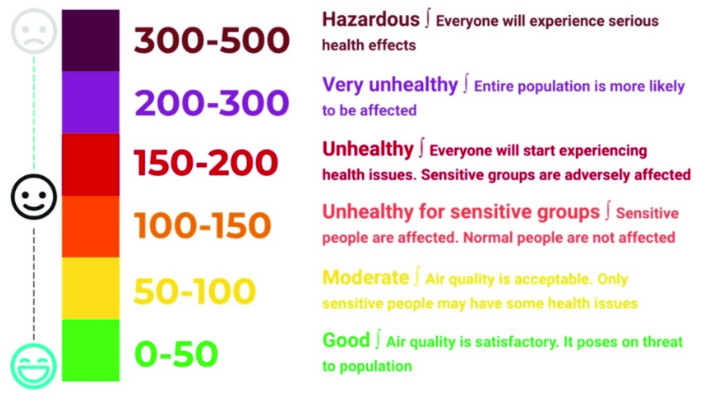

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
px_template = "simple_white"
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    contry = json.load(response)

import time
from datetime import datetime as dt

In [5]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data_date.csv')
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
13772,2024-07-04,Uzbekistan,Good,19
13773,2024-07-04,Vatican,Good,38
13774,2024-07-04,Venezuela,Good,10
13775,2024-07-04,Vietnam,Good,50


In [6]:
df.shape

(13777, 4)

In [7]:
df.columns

Index(['Date', 'Country', 'Status', 'AQI Value'], dtype='object')

**checking unique value number in variables**

In [8]:
df.nunique()

Date          90
Country      142
Status         6
AQI Value    307
dtype: int64

**describing numerical column of this dataset**

In [9]:
df.describe()

,AQI Value
count,13777.000000
mean,61.943384
std,48.974095
min,1.000000
25%,29.000000
50%,52.000000
75%,82.000000
max,963.000000


**information about this dataset**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13777 entries, 0 to 13776
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       13777 non-null  object
 1   Country    13777 non-null  object
 2   Status     13777 non-null  object
 3   AQI Value  13777 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 430.7+ KB


**checking missing or null value in this dataset**

In [11]:
df.isna().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

**checking unique values of column country**

In [12]:
df.Country.unique()

array(['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
       'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosovo', 'Kuwait', 'Kyrgyzstan', 

**changing name of 2 countries**

In [13]:
df["Country"]= df["Country"].replace({'United Kingdom of Great Britain and Northern Ireland':"Great Britain",'United States of America':"USA"})

In [14]:
plt.figure(figsize=(25,20))

px.bar(df , x = "AQI Value" , y = "Country" , color = "Status" ,  animation_frame = "Date" , width=1200, height=1000)

<Figure size 2500x2000 with 0 Axes>

**date wise AQI status of countries on world map**

In [15]:
fig = px.choropleth(df,locations = "Country", locationmode='country names', color="Status", animation_frame="Date",range_color= [25,450])
fig.show()

**Top 10 countries with highest AQI value.**

In [16]:
a = df.iloc[-141: ,:].sort_values(ascending = False ,by = "AQI Value")[:10]
a

,Date,Country,Status,AQI Value
13700,2024-07-04,India,Hazardous,305
13671,2024-07-04,Chile,Very Unhealthy,222
13769,2024-07-04,United Arab Emirates,Very Unhealthy,208
13767,2024-07-04,Uganda,Unhealthy,175
13771,2024-07-04,USA,Unhealthy,161
13681,2024-07-04,Egypt,Unhealthy,151
13672,2024-07-04,China,Unhealthy for Sensitive Groups,150
13640,2024-06-27,Great Britain,Unhealthy for Sensitive Groups,147
13701,2024-07-04,Indonesia,Unhealthy for Sensitive Groups,140
13663,2024-07-04,Brazil,Unhealthy for Sensitive Groups,135


In [17]:
px.bar(a , x = "AQI Value", y = "Country" , color = "Status" , title = "Top 10 countries with highest AQI value of yesterday.")

**Top 10 countries with lowest AQI value of yesterday.**

In [18]:
b = df.iloc[-141: ,:].sort_values(ascending = True ,by = "AQI Value")[:10]
b

,Date,Country,Status,AQI Value
13666,2024-07-04,Burkina Faso,Good,1
13727,2024-07-04,Moldova,Good,2
13717,2024-07-04,Liechtenstein,Good,6
13649,2024-07-04,Andorra,Good,9
13664,2024-07-04,Brunei,Good,10
13774,2024-07-04,Venezuela,Good,10
13660,2024-07-04,Bermuda,Good,10
13678,2024-07-04,Denmark,Good,10
13657,2024-07-04,Belarus,Good,12
13674,2024-07-04,Costa Rica,Good,12


In [19]:
px.bar(b , x = "AQI Value", y = "Country" , color = "Status" , title = "Top 10 countries with lowest AQI value of yesterday.")

Како што можеме да забележиме од визуелизациите претставени погоре. Најзагадена земја моментално, со највисок AQI е Индија.

**Top 10 Major Countries of the world**


In [20]:
major_countries = df[df['Country'].isin(['India', 'USA','China','Brazil','France','Russia','Great Britain','Japan','Germany','South Africa']) ].reset_index()
major_countries

,index,Date,Country,Status,AQI Value
0,17,2022-07-21,Brazil,Moderate,67
1,28,2022-07-21,China,Unhealthy,160
2,42,2022-07-21,France,Moderate,72
3,47,2022-07-21,Germany,Moderate,77
4,59,2022-07-21,India,Unhealthy,162
...,...,...,...,...,...
985,13707,2024-07-04,Japan,Unhealthy for Sensitive Groups,103
986,13747,2024-07-04,Russia,Moderate,81
987,13754,2024-07-04,South Africa,Unhealthy for Sensitive Groups,123
988,13770,2024-07-04,Great Britain,Good,36


In [21]:
major_countries.drop('index', axis=1, inplace=True)

In [22]:
major_countries["Date"] = pd.to_datetime(major_countries["Date"])

In [23]:
#checking information about dataset
major_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       990 non-null    datetime64[ns]
 1   Country    990 non-null    object        
 2   Status     990 non-null    object        
 3   AQI Value  990 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 31.1+ KB


In [24]:
fig = px.pie(major_countries , names = "Country" ,values = "AQI Value", title = "AQI value of major countries", hover_data = ["Status"] )
fig.update_traces(textposition='inside', textinfo='percent+label')

# Од минатите визуелизации можеме да заклучиме дека Индија е земја со најзагаден воздух, односно со највисок AQI.  Ќе направиме модел за предвидување на AQI врз база на мерењата од вредностите на различните честички.

In [25]:
import pandas as pd

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df=pd.read_csv('/content/drive/MyDrive/city_day.csv')

In [28]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [29]:
data = df[df['City'] == 'Delhi']
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
12234,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
12235,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
12236,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [30]:
data.drop(columns=['City','AQI_Bucket'], axis=1,inplace=True)
data

<ipython-input-30-aa7910bcb584>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
10229,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
10230,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0
10231,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0
10232,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0
10233,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0
12234,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0
12235,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0
12236,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0


In [31]:
tail=data.tail(50)
tail

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
12188,2020-05-13,68.80,159.20,5.09,21.34,16.74,32.29,0.90,15.41,52.20,1.81,14.78,0.39,132.0
12189,2020-05-14,56.17,126.53,9.04,25.12,21.86,30.82,0.89,12.92,50.22,1.69,14.93,0.22,154.0
12190,2020-05-15,47.44,101.93,6.76,23.45,18.90,27.39,0.84,13.71,53.08,1.41,12.60,0.22,125.0
12191,2020-05-16,81.87,151.80,6.11,26.17,19.89,27.62,0.99,16.19,63.12,1.61,11.64,0.15,175.0
12192,2020-05-17,98.63,187.24,9.24,31.96,26.01,28.76,1.06,20.19,59.79,2.07,15.58,2.12,202.0
12193,2020-05-18,101.02,192.68,11.31,34.76,29.28,28.97,1.12,22.11,53.55,2.42,17.66,2.77,222.0
12194,2020-05-19,106.63,208.65,16.68,42.67,38.49,30.58,1.31,20.41,57.05,2.75,23.02,1.74,238.0
12195,2020-05-20,67.80,155.41,8.79,32.80,25.93,28.73,1.03,18.96,62.34,1.92,15.99,0.16,196.0
12196,2020-05-21,55.92,163.77,9.67,31.36,25.81,25.55,1.09,18.99,62.56,1.72,15.20,2.43,149.0
12197,2020-05-22,94.37,213.47,17.16,45.36,40.17,28.56,1.31,26.05,55.45,2.96,26.42,11.36,199.0


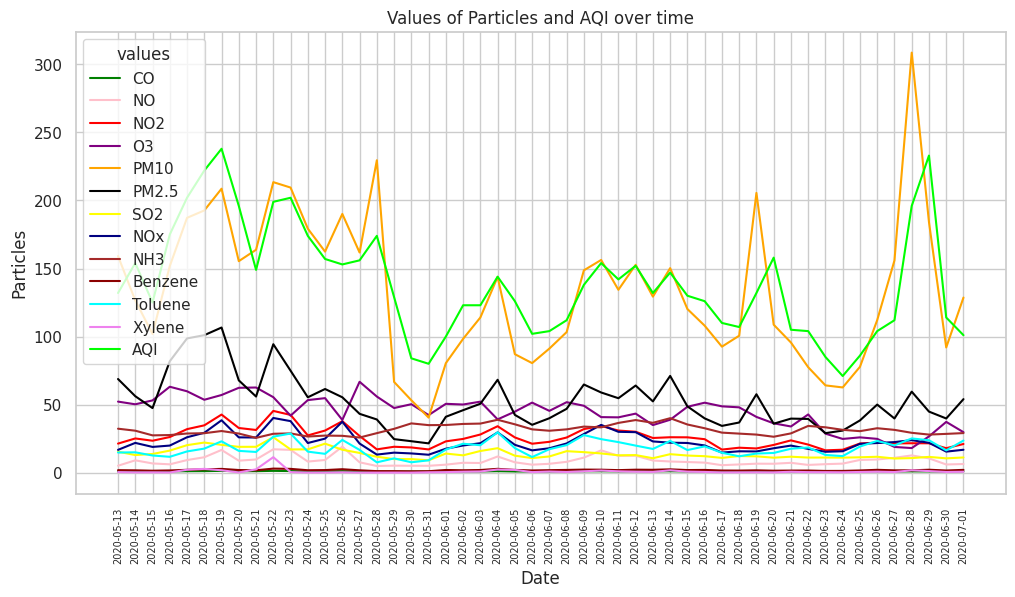

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig=plt.figure(figsize=(12, 6))
plt.title('Values of Particles and AQI over time')
plt.xlabel('Date')
plt.ylabel('Particles')
plt.plot(tail['Date'], tail['CO'], label='CO', color='green')
plt.plot(tail['Date'], tail['NO'], label='NO', color='pink')
plt.plot(tail['Date'], tail['NO2'], label='NO2', color='red')
plt.plot(tail['Date'], tail['O3'], label='O3', color='purple')
plt.plot(tail['Date'], tail['PM10'], label='PM10', color='orange')
plt.plot(tail['Date'], tail['PM2.5'], label='PM2.5', color='black')
plt.plot(tail['Date'], tail['SO2'], label='SO2', color='yellow')
plt.plot(tail['Date'], tail['NOx'], label='NOx', color='navy')
plt.plot(tail['Date'], tail['NH3'], label='NH3', color='brown')
plt.plot(tail['Date'], tail['Benzene'], label='Benzene', color='darkred')
plt.plot(tail['Date'], tail['Toluene'], label='Toluene', color='cyan')
plt.plot(tail['Date'], tail['Xylene'], label='Xylene', color='violet')
plt.plot(tail['Date'], tail['AQI'], label='AQI', color='lime')
plt.xticks(rotation=90, fontsize=7)
plt.legend(title='values', loc='upper left')
plt.show()

In [33]:
data.isnull().sum()

Date         0
PM2.5        2
PM10        77
NO           2
NO2          2
NOx          0
NH3          9
CO           0
SO2        110
O3          84
Benzene      0
Toluene      0
Xylene     781
AQI         10
dtype: int64

In [34]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=2)
data['PM2.5']=imp.fit_transform(data['PM2.5'].to_numpy().reshape(-1,1))
data['PM10']=imp.fit_transform(data['PM10'].to_numpy().reshape(-1,1))
data['NO']=imp.fit_transform(data['NO'].to_numpy().reshape(-1,1))
data['NO2']=imp.fit_transform(data['NO2'].to_numpy().reshape(-1,1))
data['NH3']=imp.fit_transform(data['NH3'].to_numpy().reshape(-1,1))
data['SO2']=imp.fit_transform(data['SO2'].to_numpy().reshape(-1,1))
data['O3']=imp.fit_transform(data['O3'].to_numpy().reshape(-1,1))
data['Xylene']=imp.fit_transform(data['Xylene'].to_numpy().reshape(-1,1))
data['AQI']=imp.fit_transform(data['AQI'].to_numpy().reshape(-1,1))

<ipython-input-34-5e008384b7d8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-5e008384b7d8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-5e008384b7d8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-5e00838

In [35]:
data.isnull().sum()

Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [36]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<ipython-input-36-a3ca093f8723>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0
2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0
2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0
2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0
2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0
2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0


In [38]:
x = data.drop("AQI", axis=1)
y = data.iloc[:, -1:]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
x_train.shape

(1607, 12)

In [42]:
import numpy as np

In [43]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [44]:
x_train.shape

(1607, 1, 12)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()

model.add(LSTM(64, input_shape=(1,12), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))





In [46]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [47]:
history = model.fit(x_train, y_train, shuffle=False, validation_split=0.2, epochs=50, batch_size=16)

Epoch 1/50
81/81 [==============================] - 6s 22ms/step - loss: 34763.7500 - mean_absolute_error: 142.4142 - val_loss: 3184.7393 - val_mean_absolute_error: 41.6535
Epoch 2/50
81/81 [==============================] - 1s 14ms/step - loss: 3127.0864 - mean_absolute_error: 40.3029 - val_loss: 2514.4426 - val_mean_absolute_error: 37.1815
Epoch 3/50
81/81 [==============================] - 1s 10ms/step - loss: 2618.3586 - mean_absolute_error: 37.4679 - val_loss: 2278.8447 - val_mean_absolute_error: 35.5312
Epoch 4/50
81/81 [==============================] - 1s 8ms/step - loss: 2384.8386 - mean_absolute_error: 35.5502 - val_loss: 2210.9175 - val_mean_absolute_error: 35.3379
Epoch 5/50
81/81 [==============================] - 1s 10ms/step - loss: 2236.0037 - mean_absolute_error: 34.6674 - val_loss: 2021.0901 - val_mean_absolute_error: 34.0632
Epoch 6/50
81/81 [==============================] - 1s 8ms/step - loss: 2139.0347 - mean_absolute_error: 33.8847 - val_loss: 2092.7617 - val_mea

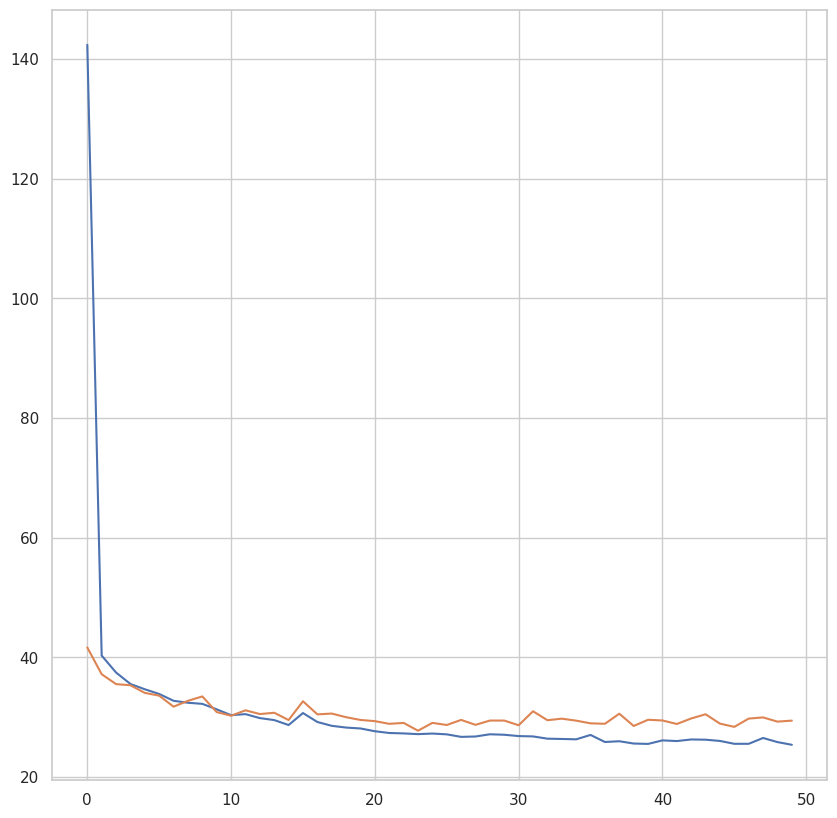

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [49]:
y_pred = model.predict(x_test)

13/13 [==============================] - 0s 3ms/step


In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [51]:
r2_score(y_test, y_pred)

0.8728618929557797

In [59]:
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('R2 score = ', r2)
print('MAPE = ', mape)




R2 score =  0.8728618929557797
MAPE =  0.12111149233287388


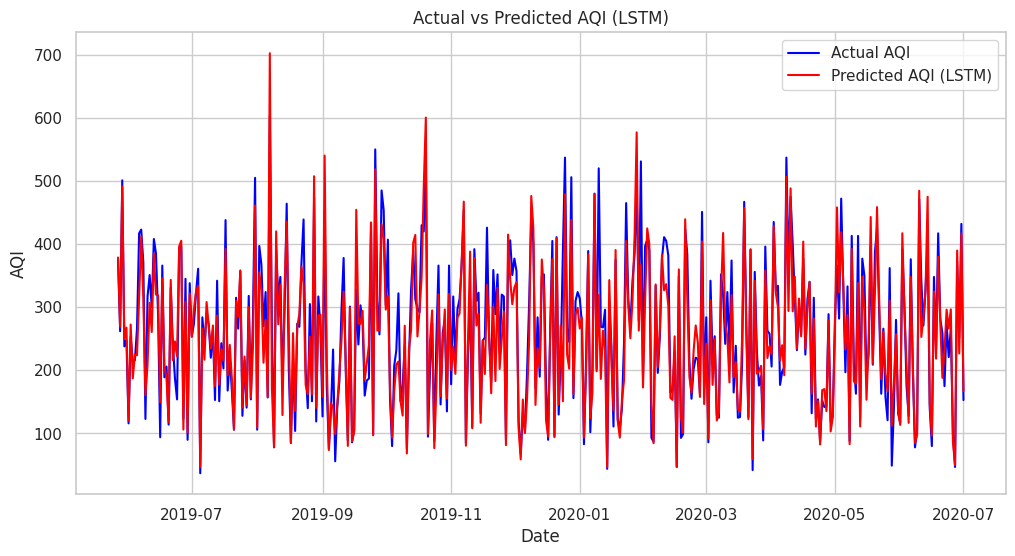

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual AQI', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted AQI (LSTM)', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI (LSTM)')
plt.legend()
plt.show()